In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = 'data/RealEstate.xlsx'
real_estate_data = pd.read_excel(file_path)

In [4]:
real_estate_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
# Create a new binary column 'Price Category' based on the median price
median_price = real_estate_data['Y house price of unit area'].median()
real_estate_data['Price Category'] = (real_estate_data['Y house price of unit area'] >= median_price).astype(int)

In [7]:
# Features and target
features = real_estate_data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
target = real_estate_data['Price Category']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [13]:
# Define the pipeline with standard scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        72
           1       0.71      0.92      0.80        53

    accuracy                           0.81       125
   macro avg       0.82      0.82      0.81       125
weighted avg       0.84      0.81      0.81       125



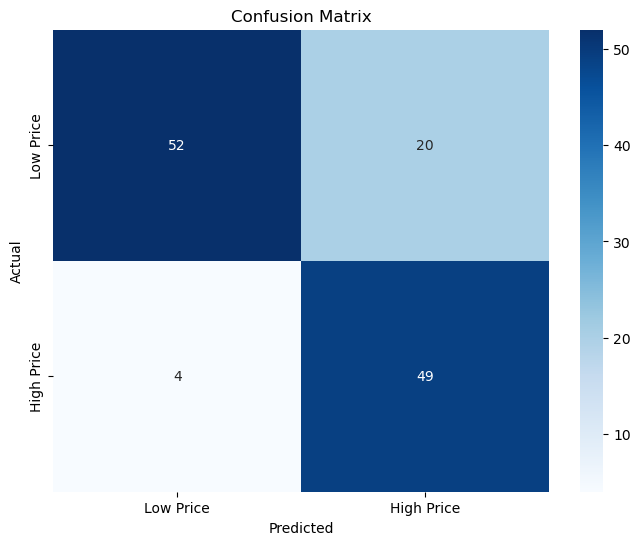

In [14]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the target values for the test set using the pipeline
y_pred_pipeline = pipeline.predict(X_test)

# Evaluate the model
classification_rep_pipeline = classification_report(y_test, y_pred_pipeline)
confusion_mat_pipeline = confusion_matrix(y_test, y_pred_pipeline)

# Print classification report
print(classification_rep_pipeline)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_pipeline, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Price', 'High Price'], yticklabels=['Low Price', 'High Price'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Metrics Overview:

Precision: The ratio of true positive predictions to the total number of positive predictions (both true positives and false positives).
Recall: The ratio of true positive predictions to the total number of actual positives (true positives and false negatives).
F1-Score: The harmonic mean of precision and recall, providing a single measure of a model's performance.
Support: The number of actual occurrences of each class in the test set.
Detailed Interpretation:
Class 0 (Low Price):

Precision: 0.93
93% of the properties predicted to be in the Low Price category were correctly classified.
Recall: 0.72
72% of the actual Low Price properties were correctly identified.
F1-Score: 0.81
This score balances precision and recall, showing good overall performance for this class.
Class 1 (High Price):

Precision: 0.71
71% of the properties predicted to be in the High Price category were correctly classified.
Recall: 0.92
92% of the actual High Price properties were correctly identified.
F1-Score: 0.80
This indicates a strong performance, especially in identifying High Price properties correctly.
Overall Accuracy: 0.81

The model correctly classified 81% of the total properties.
Macro Avg and Weighted Avg:

Macro Avg: Averages precision, recall, and F1-score across classes, giving equal weight to each class.
Weighted Avg: Averages these metrics, weighted by the number of instances in each class, providing an overall performance measure that takes class imbalance into account.
Business Implications:
High Precision for Low Price: A high precision in the Low Price category suggests that the model is conservative in predicting Low Price properties, meaning it makes fewer mistakes in overestimating a property's value.
High Recall for High Price: The high recall in the High Price category indicates that the model is good at identifying most of the properties that are truly high-priced, which is valuable for targeting high-value investments or marketing efforts.
Overall Performance: The balanced F1-scores and overall accuracy show that the model is fairly reliable for this classification task, providing useful insights for decision-making in real estate investments and pricing strategies.
These results suggest that the logistic regression model, with the preprocessing steps included in the pipeline, provides a robust tool for predicting property price categories based on the available features.